#### Import Spark libraries

In [16]:
import csv
import os
import sys
# Spark imports
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession

#### Initialize Spark Session

In [17]:
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("NYC 311 Data Analysis") \
        .config('spark.sql.codegen.wholeStage', 'false') \
        .getOrCreate()
    return spark

In [18]:
filename = "data/311_Cleaned_Data_2019.csv"

In [19]:
spark = init_spark()

#### Create Dataframe

In [20]:
nyc_311_df = spark.read.csv(filename, inferSchema=True, header=True)

## City wise Complaint Distribution - Complaints count is greater than 5000

In [21]:
grouped_city = nyc_311_df.groupBy('City', 'Complaint_Type').count().orderBy('City', 'Complaint_Type').withColumnRenamed('count', 'Count').filter('Count > 5000')

In [24]:
grouped_city_list = grouped_city.collect()
city_columns = set([row.City for row in grouped_city_list])
city_rows = set([row.Complaint_Type for row in grouped_city_list])

In [26]:
complaint_dict = {}
data = []
for row in sorted(city_rows):
    data_row = []
    for column in sorted(city_columns):
        cnt = 0
        for val in grouped_city_list:
            if val.Complaint_Type == row and val.City == column:
                cnt = int(val.Count)
                break
        data_row.append(cnt)
    data.append(data_row)
complaint_dict['rows'] = sorted(list(city_rows))
complaint_dict['columns'] = tuple(sorted(city_columns))
complaint_dict['data'] = data

### Plot

In [29]:
%matplotlib inline

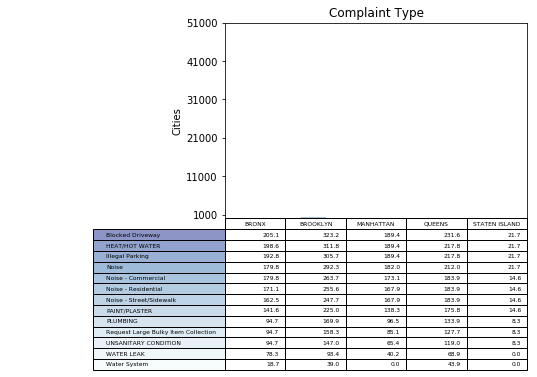

In [36]:
import numpy as np
import matplotlib.pyplot as plt

data = complaint_dict['data']

columns = complaint_dict['columns']
rows = complaint_dict['rows']

values = np.arange(1000, 59612, 10000)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Cities")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Complaint Type')

plt.show()

## Borough Wise Complaint Distribution - Complaint count is greater than 5000

In [31]:
grouped_borough = nyc_311_df.groupBy('Borough', 'Complaint_Type').count().orderBy('Borough', 'Complaint_Type').withColumnRenamed('count', 'Count').filter('Count > 5000')

In [33]:
grouped_borough_list = grouped_borough.collect()
borough_columns = set([row.Borough for row in grouped_borough_list])
borough_rows = set([row.Complaint_Type for row in grouped_borough_list])

In [34]:
complaint_dict = {}
data = []
for row in sorted(borough_rows):
    data_row = []
    for column in sorted(borough_columns):
        cnt = 0
        for val in grouped_borough_list:
            if val.Complaint_Type == row and val.Borough == column:
                cnt = int(val.Count)
                break
        data_row.append(cnt)
    data.append(data_row)
complaint_dict['rows'] = sorted(list(borough_rows))
complaint_dict['columns'] = tuple(sorted(borough_columns))
complaint_dict['data'] = data

### Plot

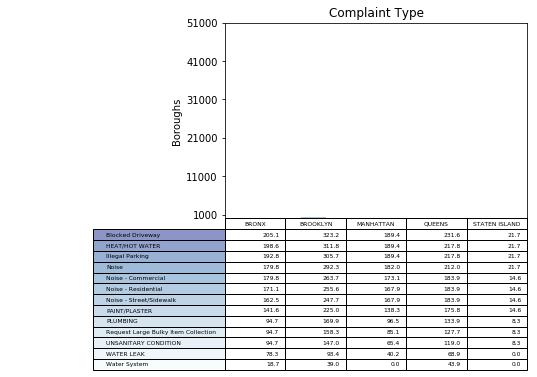

In [37]:
import numpy as np
import matplotlib.pyplot as plt

data = complaint_dict['data']

columns = complaint_dict['columns']
rows = complaint_dict['rows']

values = np.arange(1000, 59612, 10000)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Boroughs")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Complaint Type')

plt.show()